In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils


In [2]:
train = pd.read_csv(f'./../../Dataset/food_train.tsv', index_col='Index', encoding='utf-8', sep='\t')
X_train = train.drop(columns = 'target')
y_train = train.target
del train
X_test = pd.read_csv(f'./../../Dataset/food_X_test.tsv', index_col='Index', encoding='latin', sep='\t')
y_test_submission_example = pd.read_csv(f'./../../Dataset/y_test_submission_example.tsv', index_col='Index', encoding='utf-8', sep='\t')

In [3]:
X_train,X_test = utils.clean_null(X_train,X_test,0.5)
# remove brands_tags
X_train.drop(columns =['brands_tags'],inplace= True)
X_test.drop(columns =['brands_tags'],inplace= True)


Train init shape  (102028, 57)
Test  init shape  (25508, 57)
has  82.84686556631513 % null elements -> deleting .. generic_name
has  70.76684831614851 % null elements -> deleting .. quantity
has  74.81181636413532 % null elements -> deleting .. packaging
has  74.8127964872388 % null elements -> deleting .. packaging_tags
has  70.80507311718351 % null elements -> deleting .. categories
has  70.80507311718351 % null elements -> deleting .. categories_tags
has  70.80507311718351 % null elements -> deleting .. categories_en
has  93.74877484612068 % null elements -> deleting .. origins
has  93.75269533853452 % null elements -> deleting .. origins_tags
has  87.8680362253499 % null elements -> deleting .. manufacturing_places
has  87.8680362253499 % null elements -> deleting .. manufacturing_places_tags
has  82.01964166699337 % null elements -> deleting .. labels
has  81.98729760457914 % null elements -> deleting .. labels_tags
has  81.98729760457914 % null elements -> deleting .. labels_en
h

In [4]:
train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train',show=False)
test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test')

********************train********************
shape  (102028, 21)
********************test********************
shape  (25508, 21)
**********numerics**********


count          mean           std  \
created_t                                25508.0  1.475883e+09  3.107721e+07   
last_modified_t                          25508.0  1.485848e+09  1.674066e+07   
additives_n                              23016.0  1.895116e+00  2.480975e+00   
ingredients_from_palm_oil_n              23016.0  2.845846e-02  1.693888e-01   
ingredients_that_may_be_from_palm_oil_n  23016.0  6.612791e-02  3.013009e-01   

                                                  min           25%  \
created_t                                1.329342e+09  1.480619e+09   
last_modified_t                          1.341240e+09  1.489053e+09   
additives_n                              0.000000e+00  0.000000e+00   
ingredients_from_palm_oil_n              0.000000e+00  0.000000e+00   
ingredients_that_may_be_from_palm_oil_n  0.000000e+00  0.000000e+00   

                                                  50%           75%  \
created_t                                1.489067e+09  1.489133e+09   
last_modified_t                          1.489076e+09  1.489144e+09   
additives_n                              1.000000e+00  3.000000e+00   
ingredients_from_palm_oil_n              0.000000e+00  0.000000e+00   
ingredients_that_may_be_from_palm_oil_n  0.000000e+00  0.000000e+00   

                                                  max  unique  nulls  \
created_t                                1.505683e+09   23386      0   
last_modified_t                          1.505683e+09   23323      0   
additives_n                              2.700000e+01      25   2492   
ingredients_from_palm_oil_n              2.000000e+00       3   2492   
ingredients_that_may_be_from_palm_oil_n  6.000000e+00       6   2492   

                                         nulls_perc  
created_t                                  0.000000  
last_modified_t                            0.000000  
additives_n                                0.097695  
ingredients_from_palm_oil_n                0.097695  
ingredients_that_may_be_from_palm_oil_n    0.097695

**********categorical**********


count unique  \
creator                 25508    806   
created_datetime        25508  23386   
last_modified_datetime  25508  23323   
product_name            25236  22577   
brands                  24999  11027   
countries               25500    290   
countries_tags          25500    173   
countries_en            25500    173   
ingredients_text        23016  21999   
serving_size            17907   5171   
additives               23014  21656   
additives_tags          14158   5945   
additives_en            14158   5945   
states                  25508    252   
states_tags             25508    252   
states_en               25508    252   

                                                                      top  \
creator                                                   usda-ndb-import   
created_datetime                                     2017-03-09T10:45:47Z   
last_modified_datetime                               2017-03-09T09:54:57Z   
product_name                                                    Ice Cream   
brands                                                          Carrefour   
countries                                                              US   
countries_tags                                           en:united-states   
countries_en                                                United States   
ingredients_text        Semolina (wheat), durum flour (wheat), niacin,...   
serving_size                                                  28 g (1 oz)   
additives                                     [ almonds -> en:almonds  ]    
additives_tags                                           en:e322,en:e322i   
additives_en                            E322 - Lecithins,E322i - Lecithin   
states                  en:to-be-completed, en:nutrition-facts-complet...   
states_tags             en:to-be-completed,en:nutrition-facts-complete...   
states_en               To be completed,Nutrition facts completed,Ingr...   

                         freq  nulls  nulls_perc  
creator                 13483      0    0.000000  
created_datetime            5      0    0.000000  
last_modified_datetime      4      0    0.000000  
product_name               46    272    0.010663  
brands                    336    509    0.019955  
countries               13478      8    0.000314  
countries_tags          13629      8    0.000314  
countries_en            13629      8    0.000314  
ingredients_text           19   2492    0.097695  
serving_size              447   7601    0.297985  
additives                  24   2494    0.097773  
additives_tags            764  11350    0.444958  
additives_en              764  11350    0.444958  
states                  13332      0    0.000000  
states_tags             13332      0    0.000000  
states_en               13332      0    0.000000

In [5]:
total_dataset = pd.concat([X_train,X_test])

In [6]:
total_dataset['countries2'] = total_dataset['countries'].apply(utils.process_countries)
total_dataset[['countries','countries2']].head(3)


countries countries2
Index                      
104815        US         US
62513         US         US
111040        US         US

In [7]:
total_dataset['additives2'] = total_dataset['additives'].apply(utils.process_aditives)
total_dataset[['additives','additives2']].head(3)


additives  \
Index                                                       
104815   [ wheat-flour -> en:wheat-flour  ]  [ flour -...   
62513    [ select-potatoes -> en:select-potatoes  ]  [...   
111040   [ chickpeas -> en:chickpeas  ]  [ water -> en...   

                                               additives2  
Index                                                      
104815   wheat-flour,flour,corn-syrup,syrup,dextrose,s...  
62513    select-potatoes,potatoes,vegetable-shortening...  
111040   chickpeas,water,vegetable-oil,oil,soy,olive,s...

In [8]:
PRETRAINED_MODEL_PATH = './../../../Models/lid.176.bin'
bnp_process_text = utils.bnp_process_text(PRETRAINED_MODEL_PATH)


In [9]:
total_dataset['brands_language'] = total_dataset['brands'].apply(bnp_process_text.get_language_fasttext)

In [10]:
total_dataset['brands_language'].value_counts()

en    79598
fr    16282
it     5798
de     5296
es     4302
      ...  
kw        1
hy        1
jv        1
mn        1
an        1
Name: brands_language, Length: 100, dtype: int64

In [11]:
total_dataset['brands'][total_dataset['brands_language']=='fr']

Index
160769                  Auchan
114984           Le Monegasque
78892                  Lesieur
16097          Phare d'Eckmühl
86502           Creperie Colas
                  ...         
40077             Ferme Collet
45715                Carrefour
89822          Le Petit Basque
92416                   Auchan
156235    Moissons de la terre
Name: brands, Length: 16282, dtype: object

In [12]:
total_dataset[['countries','brands_language']]

countries brands_language
Index                           
104815        US              en
62513         US              en
111040        US              en
62964         US              de
57032         US              en
...          ...             ...
27754         US              en
31027         US              en
111633    France              en
174043    France              de
14465     Suisse             NaN

[127536 rows x 2 columns]

In [13]:
total_dataset[['brands','brands_language','countries','countries_en']][2870:3000].head()

brands brands_language countries   countries_en
Index                                                         
132914         Auchan              fr    France         France
24861   Target Stores              it        US  United States
53377         Raley's              en        US  United States
44754        MClassic              en    Suisse    Switzerland
1890         Shoprite              en        US  United States

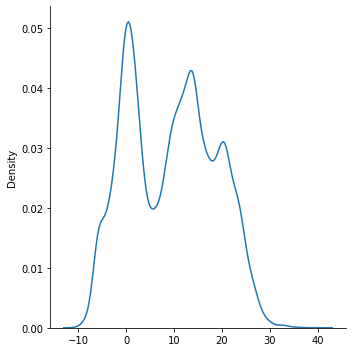

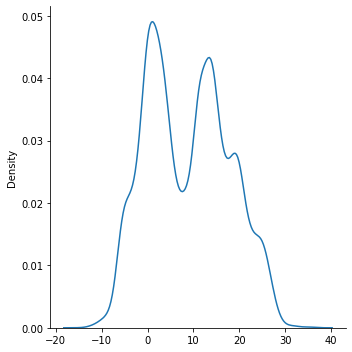

In [14]:
import seaborn as sns

sns.displot(y_train[total_dataset['countries_en']=='United States'].values,kind="kde")
sns.displot(y_train[total_dataset['countries_en']=='France'].values,kind="kde")

In [15]:
countries = pd.read_csv('../../Dataset/countryContinent.csv', encoding='ISO-8859-1', sep=',')

In [110]:
countries[countries.country == 'United States of America'].head(30)

country code_2 code_3  country_code     iso_3166_2  \
235  United States of America     US    USA           840  ISO 3166-2:US   

    continent        sub_region  region_code  sub_region_code  
235  Americas  Northern America         19.0             21.0

In [112]:
countries[countries['country'].str.contains("Kingdom")].head(100)


country code_2 code_3  \
234  United Kingdom of Great Britain and Northern I...     GB    GBR   

     country_code     iso_3166_2 continent       sub_region  region_code  \
234           826  ISO 3166-2:GB    Europe  Northern Europe        150.0   

     sub_region_code  
234            154.0

In [113]:
country_to_region_code = pd.Series(countries.region_code.values,index=countries.country).to_dict()
country_to_region_code['United States'] = 19.0
country_to_region_code['United Kingdom'] =	150.0
countrycode_to_region_code = pd.Series(countries.region_code.values,index=countries.code_2).to_dict()


In [114]:
'Algeria' in country_to_region_code

True

In [115]:
def get_region_code(x):
    if type(x[0])!= str and type(x[1])!= str:
        return 0
    if x[0].split(',')[0] in countrycode_to_region_code:
        return countrycode_to_region_code[x[0].split(',')[0]]
    if x[1].split(',')[0] in country_to_region_code:
        return country_to_region_code[x[1].split(',')[0]]
    else:
        return -1

total_dataset['region_code'] = total_dataset[['countries','countries_en']].apply(get_region_code,axis=1)


In [116]:
total_dataset[['countries','countries_en','region_code']]

countries   countries_en  region_code
Index                                       
104815        US  United States         19.0
62513         US  United States         19.0
111040        US  United States         19.0
62964         US  United States         19.0
57032         US  United States         19.0
...          ...            ...          ...
27754         US  United States         19.0
31027         US  United States         19.0
111633    France         France        150.0
174043    France         France        150.0
14465     Suisse    Switzerland        150.0

[127536 rows x 3 columns]

In [117]:
import numpy as np
import pandas as pd
#from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
random_state = 1234
pd.options.plotting.backend = "plotly"

In [118]:
def plot_cluster(X, y, title="Cluster plot"):
    fig = X.plot.scatter(x='region_code', y='target', color=y)
    fig.layout.update(autosize=False, width=475, height=475,
                  coloraxis = dict(showscale=False, colorscale='Portland'),
                  font=dict(size=18),
                  title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig

In [119]:
print(total_dataset['region_code'].unique())
total_dataset[['brands','brands_language','countries','countries_en','region_code']][total_dataset['region_code']== -1]

[ 19. 150.   9.   2. 142.  -1.   0.]


brands brands_language          countries  \
Index                                                          
151616          Большевик              ru             Россия   
157090              Calvé              sk             Россия   
48881                 NaN             NaN        South Korea   
121922                NaN             NaN              world   
102201       Harvest Moon              en     European Union   
...                   ...             ...                ...   
133277           Pringles              en       Ð Ð¾ÑÑÐ¸Ñ   
146065          Carrefour              fr            BelgiÃ«   
124878  Pic's Really Good              en          en:TW, US   
73704            Estrella              es       Ð Ð¾ÑÑÐ¸Ñ   
121881     BONI SELECTION              it  Union europÃ©enne   

                countries_en  region_code  
Index                                      
151616                Russia         -1.0  
157090                Russia         -1.0  
48881            South Korea         -1.0  
121922                 World         -1.0  
102201        European Union         -1.0  
...                      ...          ...  
133277                Russia         -1.0  
146065                Belgie         -1.0  
124878  Taiwan,United States         -1.0  
73704                 Russia         -1.0  
121881        European Union         -1.0  

[80 rows x 5 columns]

brands brands_language  \
Index                                     
121486  Nutella,Ferrero              it   
170001          Trianon              en   
29290        Woolworths              en   

                                                countries  \
Index                                                       
121486  Algérie,Belgique,Canada,France,Allemagne,Itali...   
170001                                       Burkina Faso   
29290                                        South Africa   

                                             countries_en  region_code  
Index                                                                   
121486  Algeria,Belgium,Canada,France,Germany,Italy,Ma...          2.0  
170001                                       Burkina Faso          2.0  
29290                                        South Africa          2.0

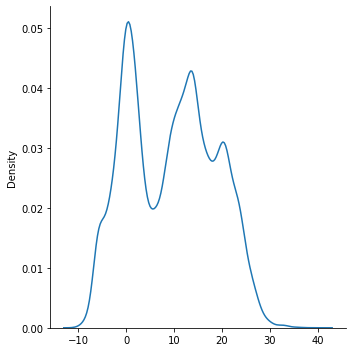

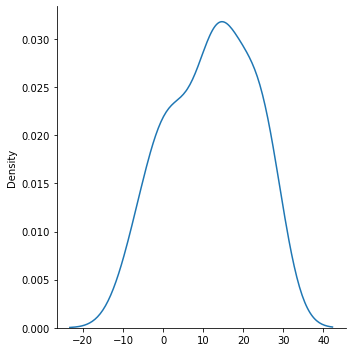

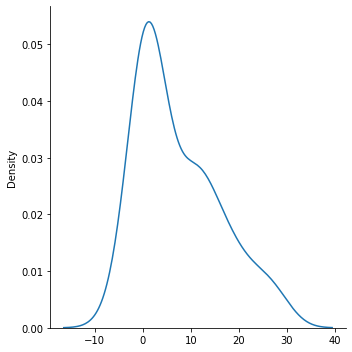

In [120]:
import seaborn as sns

sns.displot(y_train[total_dataset['region_code']== 19].values,kind="kde")
sns.displot(y_train[total_dataset['region_code']== 2].values,kind="kde")
sns.displot(y_train[total_dataset['region_code']== 142].values,kind="kde")
total_dataset[['brands','brands_language','countries','countries_en','region_code']][total_dataset['region_code']==2].head(3)


In [72]:
a = pd.DataFrame(total_dataset['region_code'][:102028],columns=['region_code'])
a['target']= y_train.values
a = a.fillna(0)


In [53]:
model = KMeans(n_clusters=3, random_state=random_state).fit(a)
pred = model.labels_
fig = plot_cluster(a, pred, title="Continuous Only")
fig